In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [13]:
file_path = 'C:/Users/patri/OneDrive/Documents/PYthon course/files/AmesHousing.csv'
df = pd.read_csv(file_path)

In [19]:
X_train = df[['Lot Area']]
y_train = df['SalePrice']

In [20]:
# Initialize the Random Forest regressor with default hyperparameters
regressor = RandomForestRegressor()

# Fit the model to the training data
regressor.fit(X_train[['Lot Area']], y_train)

RandomForestRegressor()

In [29]:
# Define the range of hyperparameter values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest regressor
regressor = RandomForestRegressor()


# Random Search
random_search = RandomizedSearchCV(regressor, param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Fit the model with the tuned hyperparameters
regressor = RandomForestRegressor(**best_params)
regressor.fit(X_train, y_train)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 5}


RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=300)

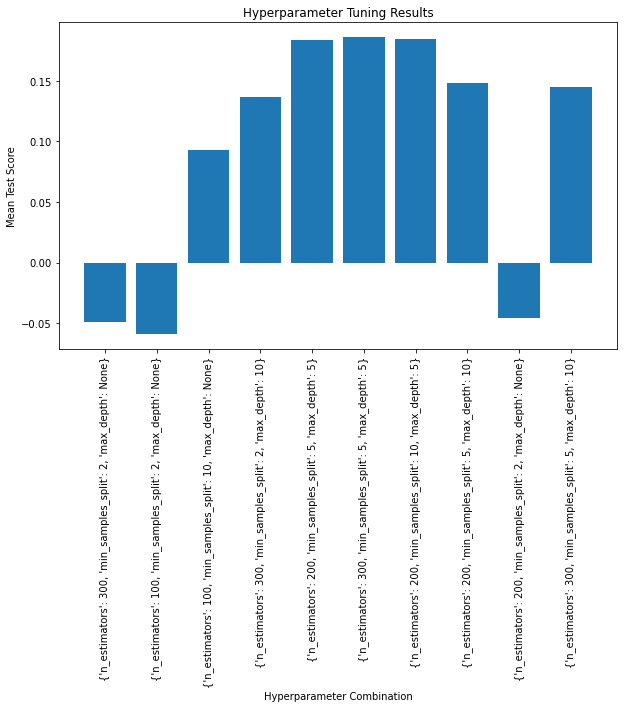

In [31]:
import matplotlib.pyplot as plt

# results of hyperparameter tuning
results = random_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']

# values of the hyperparameters for the x-axis
x_values = [str(param) for param in params]

# Plot the mean scores for each hyperparameter combination
plt.figure(figsize=(10, 6))
plt.bar(x_values, mean_scores)
plt.xticks(rotation=90)
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Mean Test Score')
plt.title('Hyperparameter Tuning Results')
plt.show()